# Lending Club Case Study (NAZ and SYED)
## Steps Executed 
### Loading Data and Data Inspection using Pandas (Loan.csv from local)
### Data Distribution using Categorical Vars
### Univariate Analysis using Bar plots,  Pie Charts,Kde
### Bivariate analysis using Box plots, Scatter Plots,Distribution plot
### Correlation Visualization using Heatmaps
####  Analysis is done using these variables:
#### Data Description
###### 
<html><head>
    <B>
        ######### Categorical variables and Continuous Variables: #############  :
    </B>
<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>

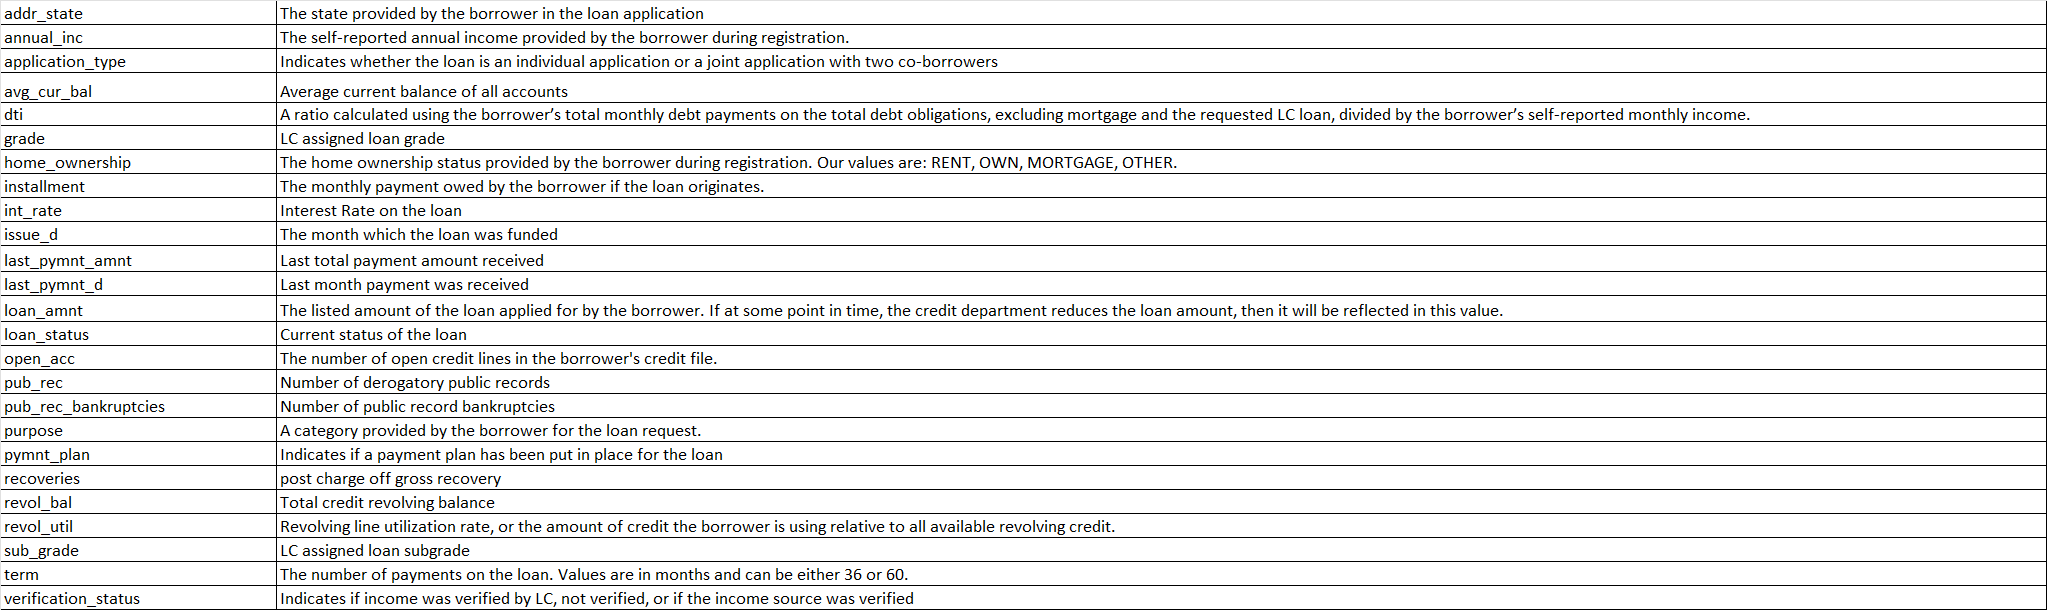


</body>
</html>






In [3]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("Data reading")

Data reading


In [5]:
# Downloading data from local and loading data as a data frame
data = pd.read_csv("C:/Users/Public/jupiter/loan.csv")
data.head()

C:\Users\SAMAN ABBAS\AppData\Local\Temp\ipykernel_17736\265127078.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/Public/jupiter/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


###### data processing

In [6]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(39717, 111)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning steps
#### Missing Values removal and removal of un wanted coulmns with N/A or zero value  and checking for duplicates
#### Removing the outlier in this case Annual income has few outliers for full paid loan status
#### Filtering the data on basis of specific column values (in this case on basis of Loan status for charged off for "some scenarios")
#### Standarding the values for columns like issue_d, emp_length, int_rate (removal of suffix or prefix like < , years/year , %
   ###### -- Changes are done at respective places in code accordingly 
#### Aggregate the data on the basis of group by column like loan_status , charge_off Proportion(agg column value)


In [159]:
data.isnull().sum()
# Convert the dictionary into DataFrame and remove un wanted column from analysis which has 0 or NA value
df = pd.DataFrame(data)
df2 = df.drop(df.loc[:, 'dti_joint':'total_il_high_credit_limit'].columns, axis=1)
df2.shape
#df2.info() # full data  set with entire set of all status included for all charged off and fully paid and current
df2["annual_inc"].describe()
#remove the outlier 
df2 = df2[df2["annual_inc"] < df2["annual_inc"].quantile(0.99)]
df2["annual_inc"].describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

#### Filering the data based on column values

In [160]:
rslt_df = df2[df2['loan_status'] == "Charged Off"] # filter data for records who are charged_off this phase analysis is done only on that
rslt_df.info()
#rslt_df.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 1 to 39688
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5584 non-null   int64  
 1   member_id                    5584 non-null   int64  
 2   loan_amnt                    5584 non-null   int64  
 3   funded_amnt                  5584 non-null   int64  
 4   funded_amnt_inv              5584 non-null   float64
 5   term                         5584 non-null   object 
 6   int_rate                     5584 non-null   object 
 7   installment                  5584 non-null   float64
 8   grade                        5584 non-null   object 
 9   sub_grade                    5584 non-null   object 
 10  emp_title                    5107 non-null   object 
 11  emp_length                   5357 non-null   object 
 12  home_ownership               5584 non-null   object 
 13  annual_inc       

In [3]:
# Analysis for Data Distributions using Histograms
#categorical = ['home_ownership', 'sub_grade', 'grade', 'loan_status', 'application_type', 'verification_status']

#### Data distrbution using plots for above Categorical values
#### UNIVARIATE ANALYSIS
##### Ordered Variable: Grade, sub grade , term ,emp_len
###### Un ordered : Loan status, verification status , purpose ,home_owner ship,addr_state
###### Quantitative : Apart from above rest like dti, installment, loan_amnt,annual_inc etc . Are continuous vars

Data Distribution by Ownership
Inference : Customers who are on RENT are more likely to default and hence High risk customers


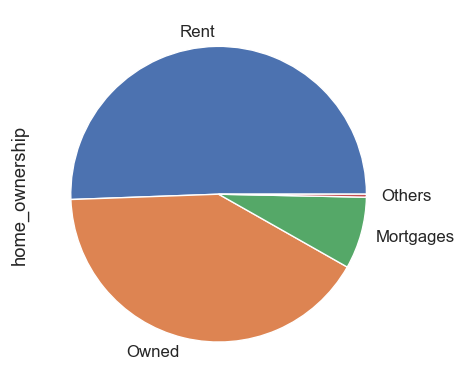

In [161]:
print('Data Distribution by Ownership')

#rslt_df.home_ownership.value_counts(sort=False).plot(kind='bar')
print('=========================================')
rslt_df.home_ownership.value_counts().plot(kind='pie', labels=['Rent', 'Owned' , 'Mortgages' , 'Others'])
print("Inference : Customers who are on RENT are more likely to default and hence High risk customers")

Data distribution by Verification status
Inference : Customers who are NOT having proper Verification are more likely to default and hence High risk customers


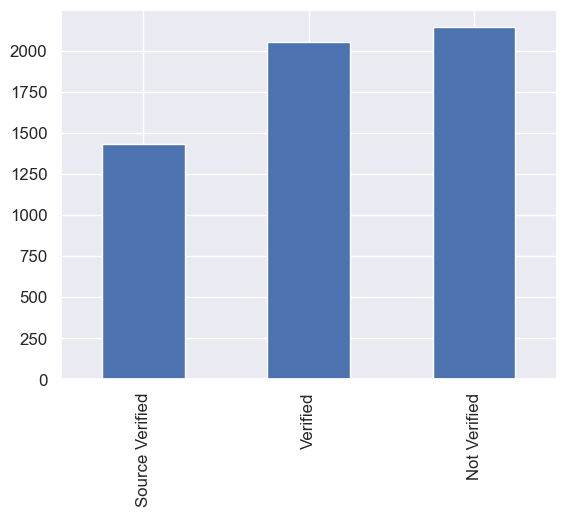

In [135]:
print("Data distribution by Verification status")
print("========================================")
rslt_df.verification_status.value_counts(sort=False).plot(kind='bar')

print("Inference : Customers who are NOT having proper Verification are more likely to default and hence High risk customers")

Data distribution by Grade
Inference : Not much visibility by this data except that B and C grades are more likely to default within defaulters


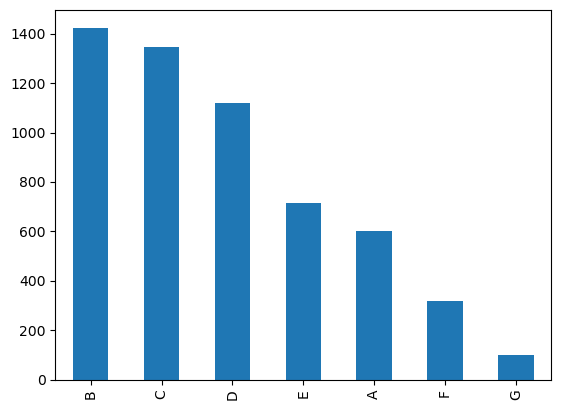

In [17]:

print("Data distribution by Grade")
print("========================================")
rslt_df.grade.value_counts(sort=True).plot(kind='bar')
print("Inference : Not much visibility by this data except that B and C grades are more likely to default within defaulters")

 This clearly indicates that Debt consolidation purpose is main category for charge off


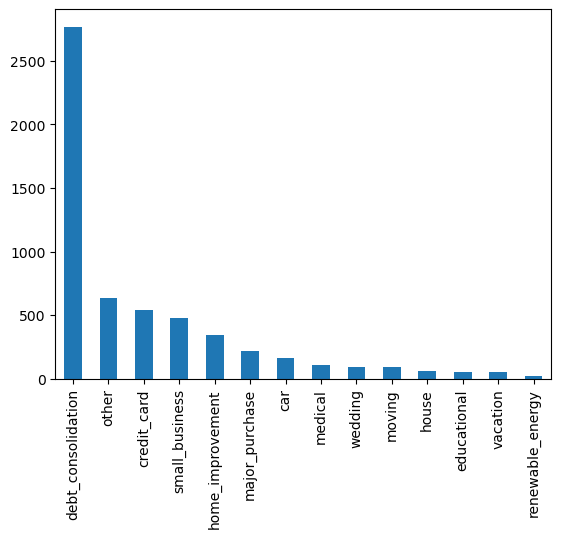

In [10]:
rslt_df.purpose.value_counts(sort=True).plot(kind='bar')
print(" This clearly indicates that Debt consolidation purpose is main category for charge off")

Inference : Maximum charge off are from who are renting and have mortages and taken loan for purpose of debt consolidation


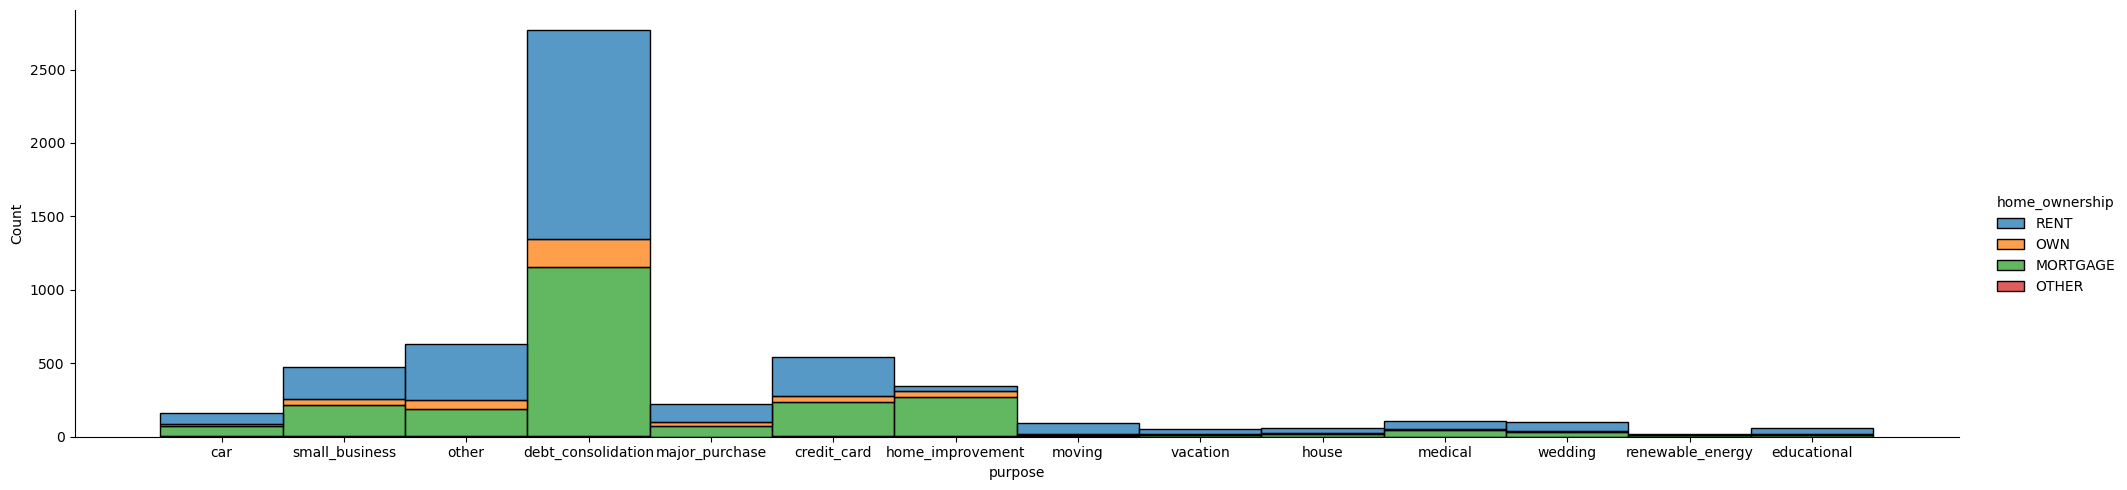

In [11]:

sns.displot(data=rslt_df, x="purpose", hue="home_ownership", multiple="stack",height =5, aspect=4)
print("Inference : Maximum charge off are from who are renting and have mortages and taken loan for purpose of debt consolidation")

Data distribution by Address State
Inference : Maximum charge off are from California that means better checks in CA state and FL or NY


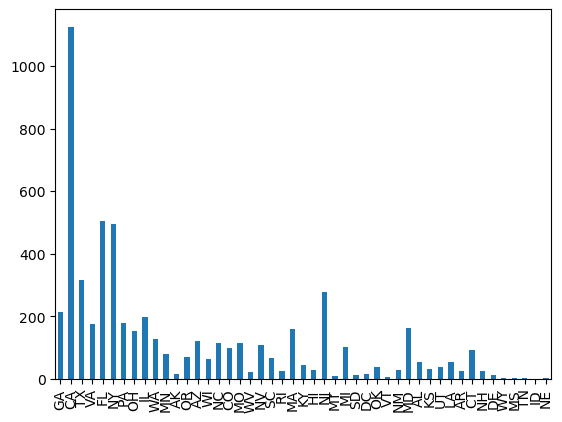

In [23]:
print("Data distribution by Address State")
print("========================================")
rslt_df.addr_state.value_counts(sort=False).plot(kind='bar')
#plt.figure(figsize=(100,10))
print("Inference : Maximum charge off are from California that means better checks in CA state and FL or NY")

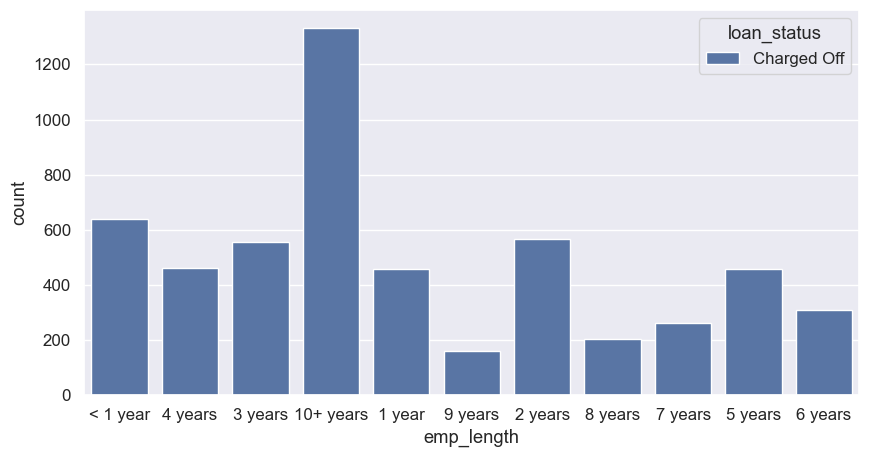

In [138]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1 = sns.countplot(x="emp_length",data=rslt_df,hue='loan_status') ### only charge off data set 

 this shows that candidates with less term are more defaulters 


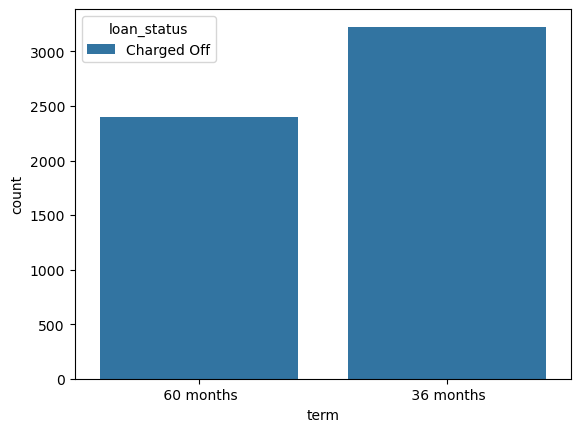

In [13]:
ax = sns.countplot(x="term",data=rslt_df,hue='loan_status')
#sns.displot(data=rslt_df, x="addr_state", hue="verification_status", multiple="stack",height=6, aspect=2)rslt_df
print(" this shows that candidates with less term are more defaulters ")

% For charge off are higher for 36 months term


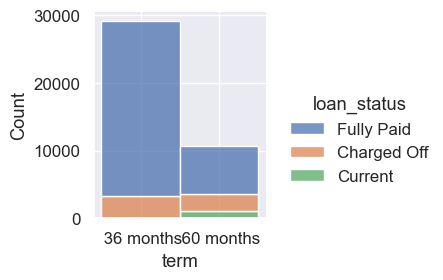

In [139]:
sns.displot(data=df2, x="term", hue="loan_status", multiple="stack",height =3, aspect=1)
print("% For charge off are higher for 36 months term")

Inference : Below show that loan amount < 10 K with rent or mortgages have highest defaulters this needs further analysis  


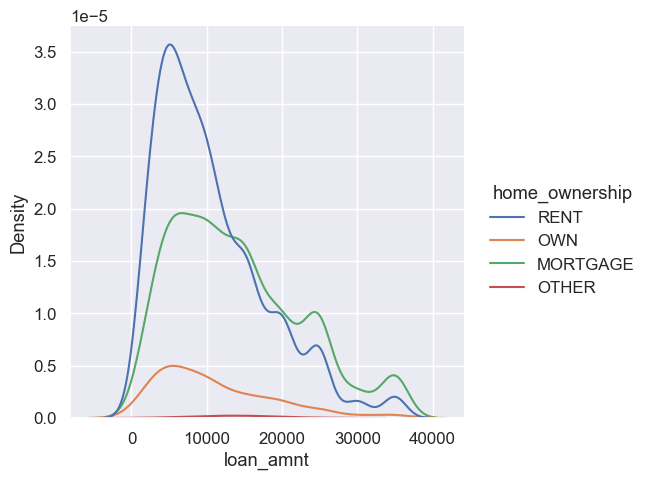

In [168]:
sns.displot(data=rslt_df, x="loan_amnt", hue = "home_ownership", kind="kde")
print("Inference : Below show that loan amount < 10 K with rent or mortgages have highest defaulters this needs further analysis  ")

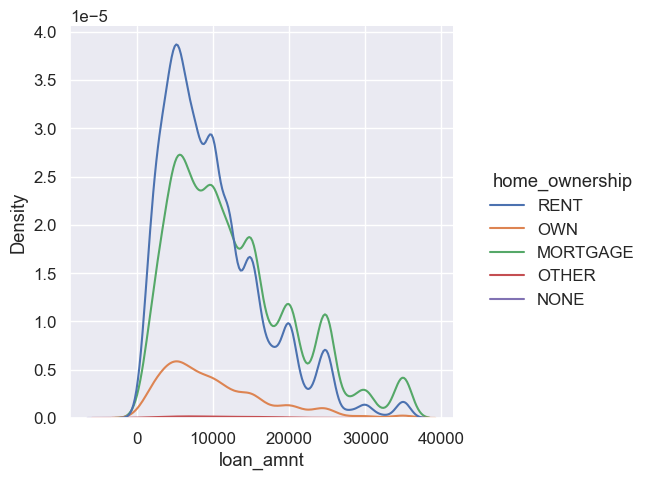

In [162]:
sns.displot(data=df2, x="loan_amnt", hue = "home_ownership", kind="kde")
## even if u do this on entire data set this does not change the result

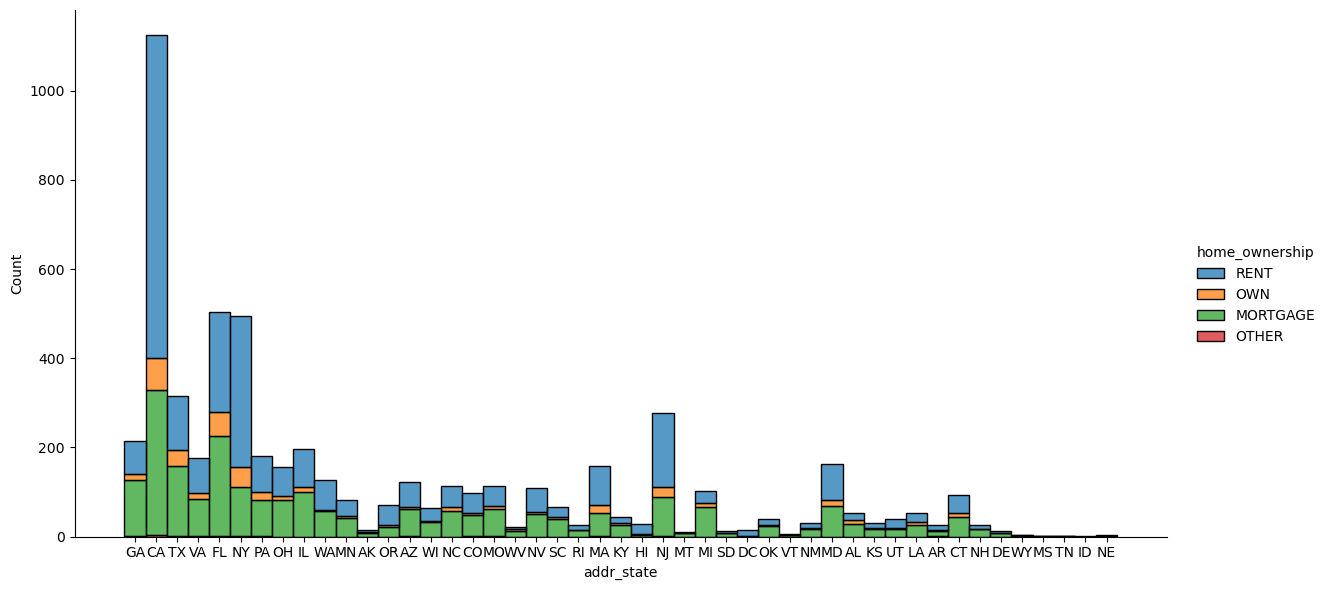

In [81]:
sns.displot(data=rslt_df, x="addr_state", hue="home_ownership", multiple="stack",height=6, aspect=2)

Inference : Above 2 graphs show that Rented owners and with non verified status are likely to charge off and is prominent in CA  


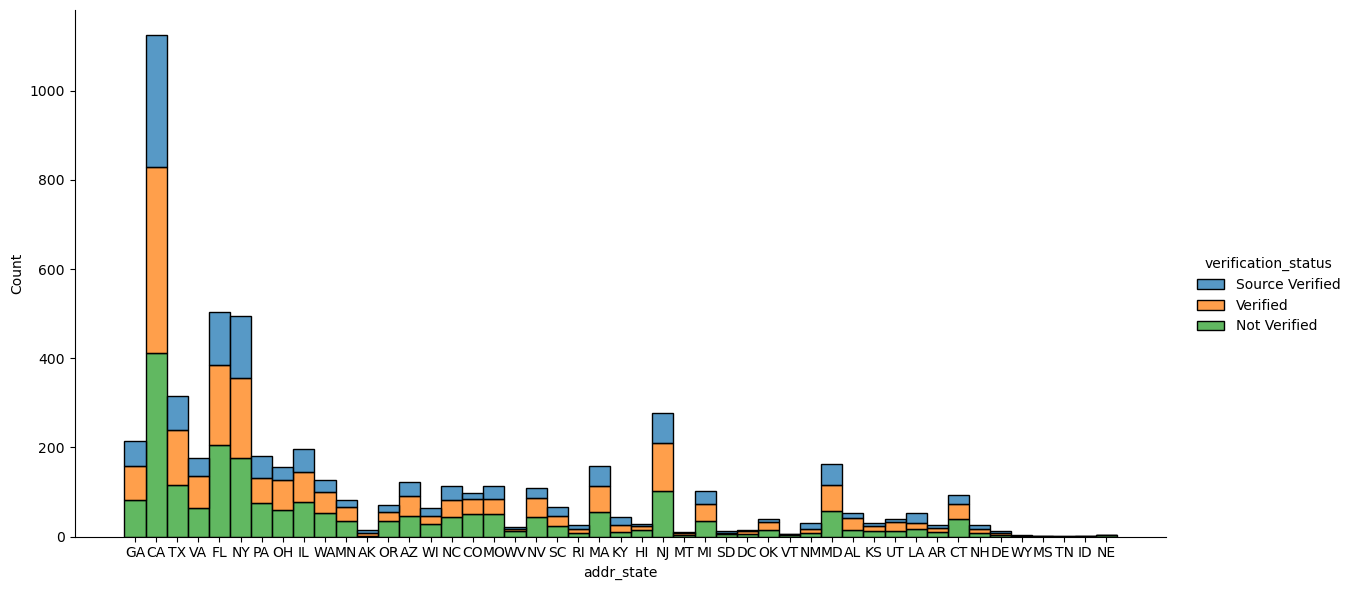

In [17]:
sns.displot(data=rslt_df, x="addr_state", hue="verification_status", multiple="stack",height=6, aspect=2)
print("Inference : Above 2 graphs show that Rented owners and with non verified status are likely to charge off and is prominent in CA  ")

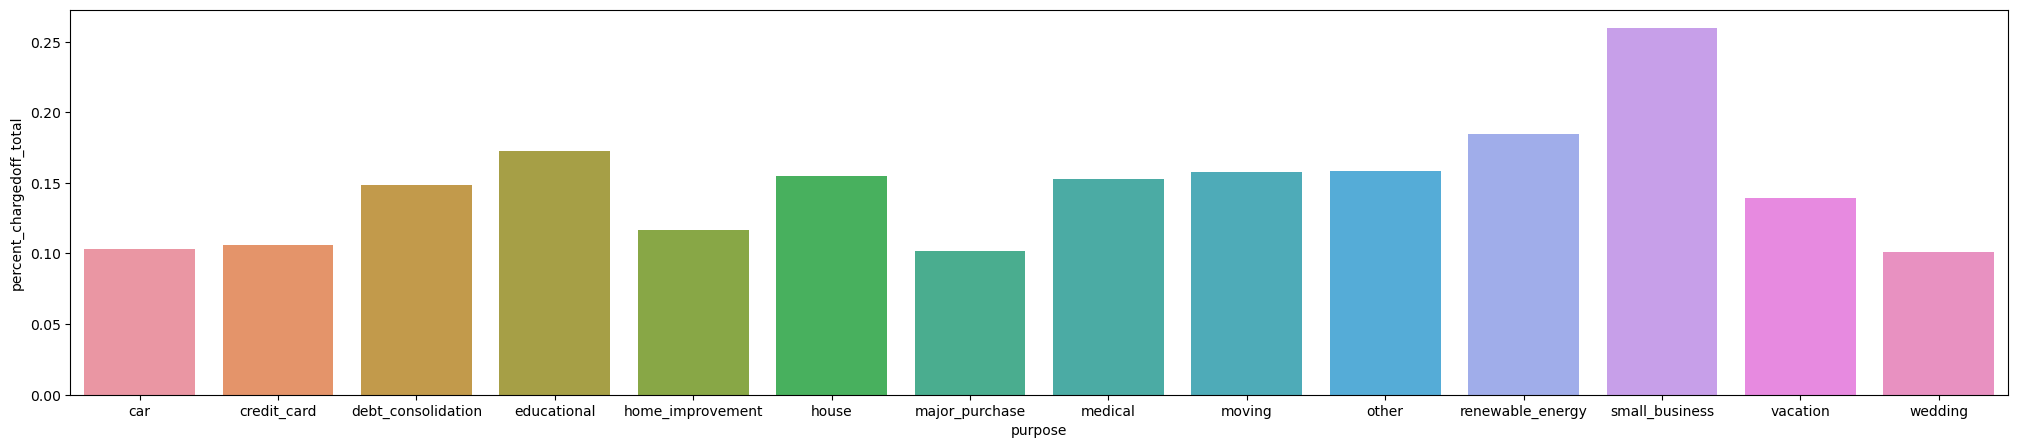

In [86]:
# we need to Group by data on basis of purpose and loan status annual and how it behaves in across entire data 
#note we are taking Non filtered data frame now 

bi_var_purpose_and_loan_sts = df2.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

bi_var_purpose_and_loan_sts['chargedoff_total'] = bi_var_purpose_and_loan_sts['Charged Off']+bi_var_purpose_and_loan_sts['Current']+ bi_var_purpose_and_loan_sts['Fully Paid']
bi_var_purpose_and_loan_sts['percent_chargedoff_total']=bi_var_purpose_and_loan_sts['Charged Off'] / bi_var_purpose_and_loan_sts['chargedoff_total']                                                           
#print(bi_var_purpose_and_loan_sts)
fig, ax1 = plt.subplots(figsize=(25, 5))
ax1=sns.barplot(x='purpose', y='percent_chargedoff_total', data=bi_var_purpose_and_loan_sts)

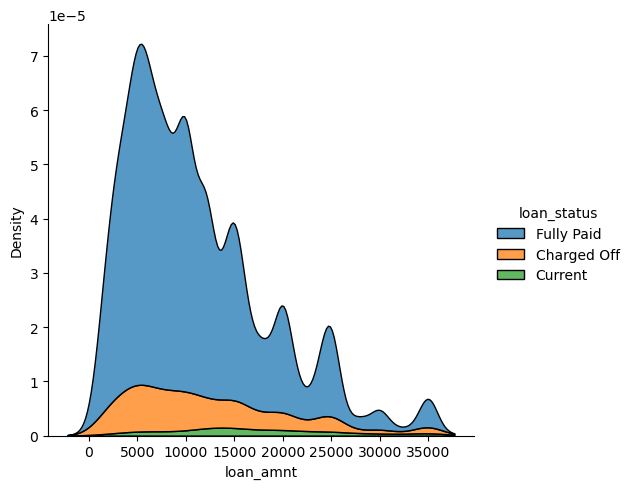

In [59]:
sns.displot(data=df2, x="loan_amnt", hue = "loan_status", kind="kde" ,  multiple="stack")

Inference : DTI is negatively correlated with annual inc or loan amount and recoveries is also very weakly correlated with most vars not giving much insight


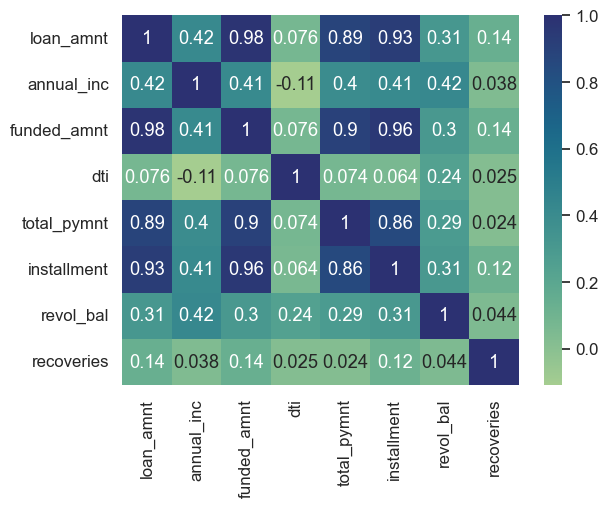

In [163]:
#### See the correlation between variables create a new DF from existing ones for continuous valriable

df_new_corr = df2[['loan_amnt', 'annual_inc','funded_amnt','dti','total_pymnt','installment','revol_bal','recoveries']]
#print(df_new_corr.info())
loan_correlation = df_new_corr.corr()
sns.set(font_scale=1.1)
#sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="crest")
sns.heatmap(loan_correlation,annot=True,cmap="crest")
print("Inference : DTI is negatively correlated with annual inc or loan amount and recoveries is also very weakly correlated with most vars not giving much insight")

### BI VARIATE Analysis on Categorical as well as Quantitative Variables
###### Ordered Variable: Grade, sub grade , term
###### Un ordered : Loan status, verification status , purpose ,home_owner ship,addr_state
###### Segmented Data :LOAN_AMNT_RANGE,EMP_LEN_RANGE,INTEREST_RATE_RANGE
###### Derived Data :CHARGE_OFF_PROPORTION,YEAR, EMPLOYEE _EXPERIENCE(emp_len)

Inference : people having charge off are having median value of 10k


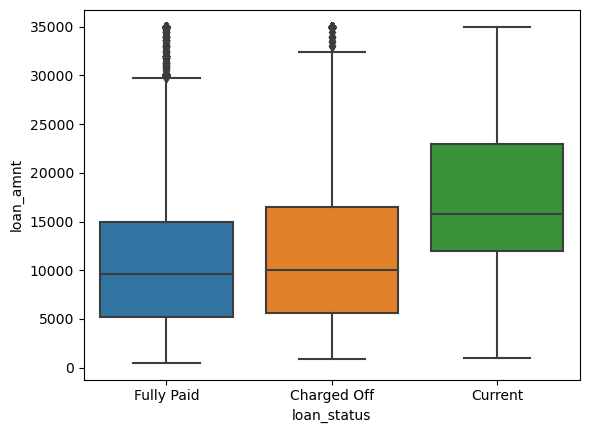

In [22]:
sns.boxplot(data=df2, x="loan_status", y="loan_amnt")
print("Inference : people having charge off are having median value of 10k")

Inference : Grade F , G , E have high interest rates as compared to others


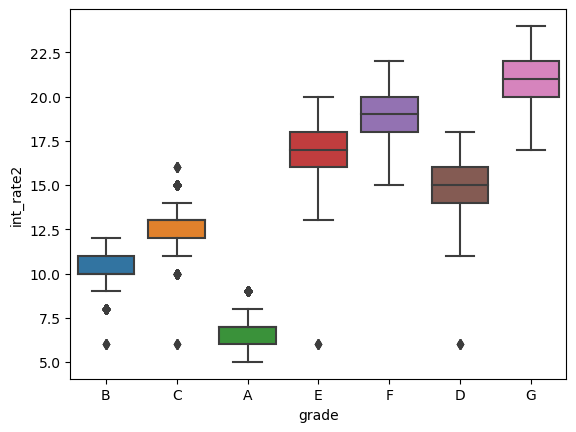

In [44]:
#sns.boxplot(data=df2, x="grade", y="int_rate") #   error as int_rate is not numeric convert it first
#df2["int_rate_num"] = df2['int_rate'].str.extract('(\d+)')
df2['int_rate'] = df2['int_rate'].str.extract('(\d+)')
df2['int_rate2'] = df2['int_rate'].astype(str).astype(int)# converts object type to float or numeric var
df2['int_rate2'].head()
#df2.head()
#print(df2.head())
#df2["int_rate_num"] = df2
sns.boxplot(data=df2, x="grade", y="int_rate2")
print("Inference : Grade F , G , E have high interest rates as compared to others")

Inference : Customers at charge off are having high interst rate (median) as compared to Fully paid


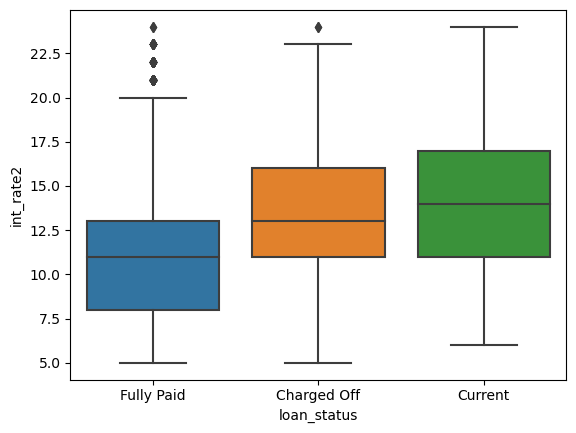

In [38]:
sns.boxplot(data=df2, x="loan_status", y="int_rate2")
print("Inference : Customers at charge off are having high interst rate (median) as compared to Fully paid")

Inference for Interetest rate vs loan amount gives that higher median of loan amount for higher interest rates


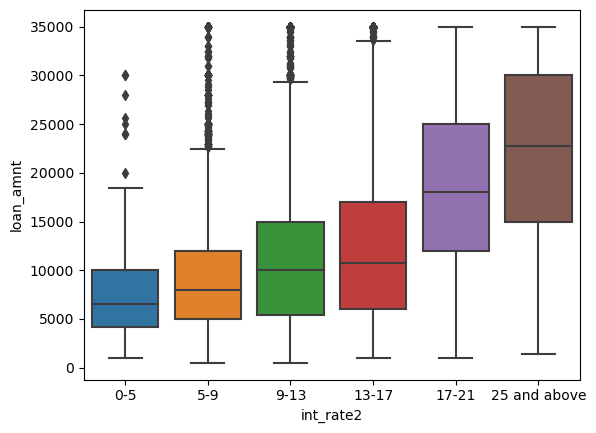

In [113]:
ax = sns.boxplot(x="int_rate2",data=df2,y="loan_amnt")
print("Inference for Interest rate vs loan amount gives that higher median of loan amount for higher interest rates")

<Axes: xlabel='loan_status', ylabel='dti'>

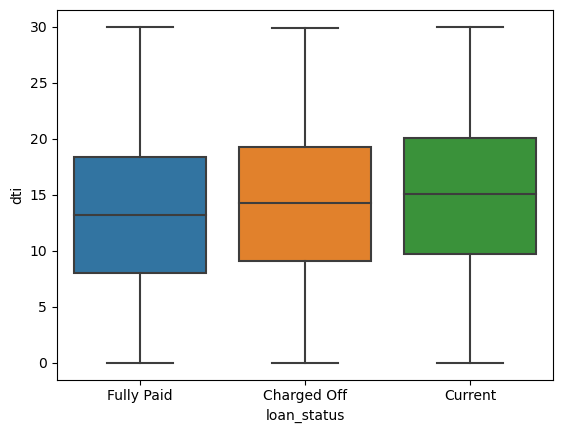

In [89]:
sns.boxplot(data=df2, x="loan_status", y="dti")
print("Inference for DTI vs loan status gives that  charge off have higher median than fully paid")

Inference : E,F,G have higher Debt to income ratio


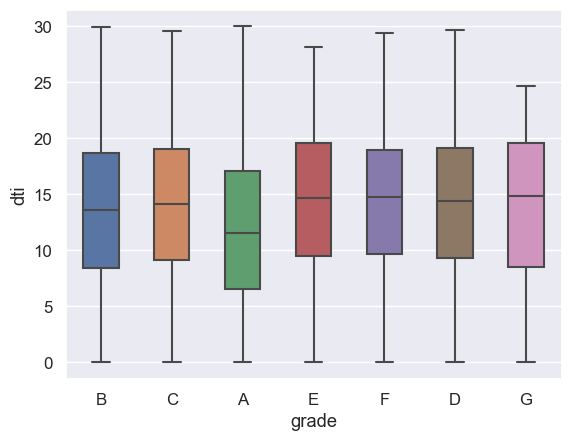

In [165]:
#bi_var_grade_and_dti = df2.groupby(['grade', 'dti']).grade.count().unstack().fillna(0).reset_index()
#print(bi_var_grade_and_dti)
#sns.countplot(bi_var_grade_and_dti, x="grade" , stat="percent")sns.boxplot(data=df2, y="purpose", x="installment",width=.5)
sns.boxplot(data=df2, y="dti", x="grade",width=.5)
print("Inference : E,F,G have higher Debt to income ratio")

Installments for credit card , debt consolidation , small_business and house are more with regards to others


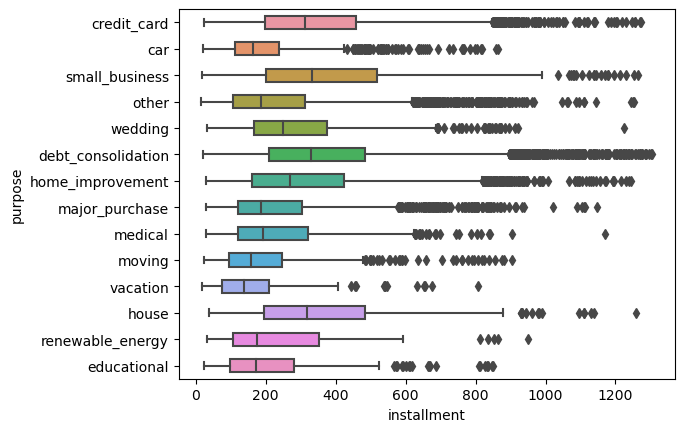

In [87]:
sns.boxplot(data=df2, y="purpose", x="installment",width=.5)
print("Installments for credit card , debt consolidation , small_business and house are more with regards to others")

Inference : Customers are wanting loan more for the purpose of small business , debt_con ,house,house improvement


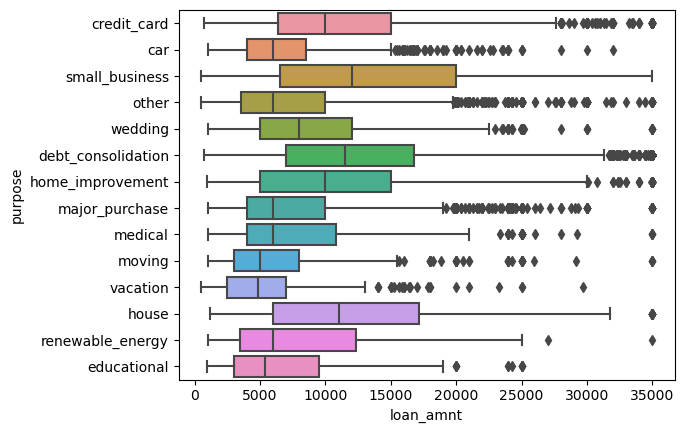

In [43]:
sns.boxplot(data=df2, x="loan_amnt", y="purpose")
print("Inference : Customers are wanting loan more for the purpose of small business , debt_con ,house,house improvement")

Number of  charge  off are higher on bigger loan amount and their installment are also high


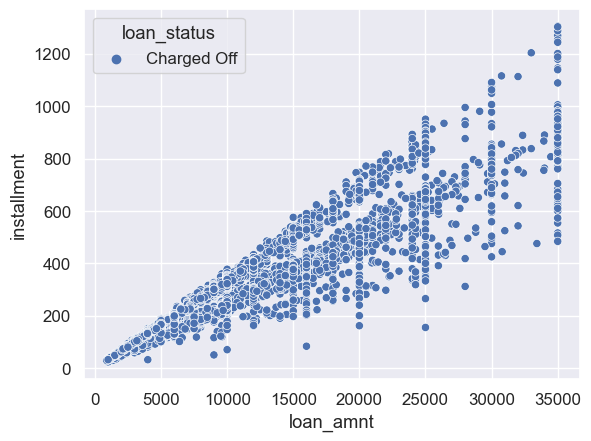

In [166]:
sns.scatterplot(data=rslt_df, x="loan_amnt", y="installment" ,hue = "loan_status") 
print("Number of  charge  off are higher on bigger loan amount and their installment are also high")

proportion of fully paid are higher than charge off 


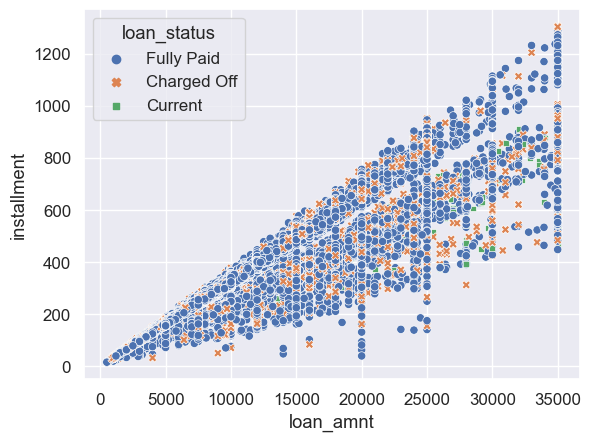

In [167]:
#sns.boxplot(data=df2, x="loan_amnt", y="annual_inc")
sns.scatterplot(data=df2, x="loan_amnt", y="installment" ,hue = "loan_status", style="loan_status") 
print("proportion of fully paid are higher than charge off ")

In [142]:
#sns.boxplot(data=df2, x="loan_status", y="emp_length") -- gsve error that emp len is not numeric
# will have to derive column emp len in numerc to do any analysis similar approach for loan isue date as well
df2['loanissue_mon'],df2['loanissue_yr'] = df2['issue_d'].str.split('-' ,1).str
#df2[['issue_d','loanissue_mon','loanissue_yr']].head()

#df2[loanissue_yr] = df2[loanissue_yr].apply(pd.to_numeric)
df2['loanissue_yr'].astype(str).astype(int)



C:\Users\SAMAN ABBAS\AppData\Local\Temp\ipykernel_16240\1591899622.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2['loanissue_mon'],df2['loanissue_yr'] = df2['issue_d'].str.split('-' ,1).str
C:\Users\SAMAN ABBAS\AppData\Local\Temp\ipykernel_16240\1591899622.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df2['loanissue_mon'],df2['loanissue_yr'] = df2['issue_d'].str.split('-' ,1).str


0        11
1        11
2        11
3        11
4        11
         ..
39712     7
39713     7
39714     7
39715     7
39716     7
Name: loanissue_yr, Length: 39717, dtype: int32

<Axes: xlabel='loanissue_yr', ylabel='Charged Off'>

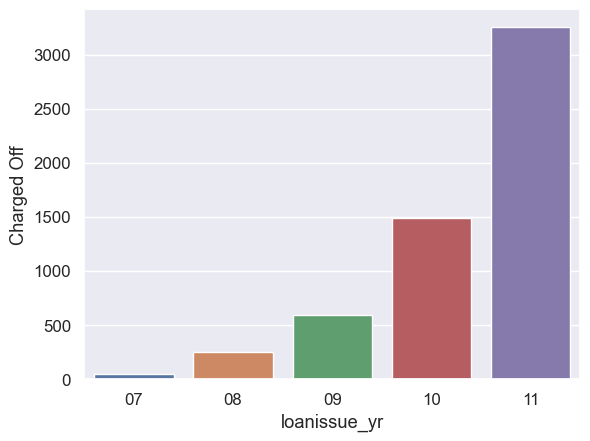

In [143]:
bi_var_loan_date_and_loan_sts = df2.groupby(['loanissue_yr', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#bi_var_loan_date_and_loan_sts.info()
#print(bi_var_loan_date_and_loan_sts)
#bi_var_loan_date_and_loan_sts['loan_status'].info()
sns.barplot(data=bi_var_loan_date_and_loan_sts, x="loanissue_yr", y="Charged Off")

#fig, ax1 = plt.subplots(figsize=(25, 5))


Both the graph shows that number of loans issued are increasing every year and 2011 is highest


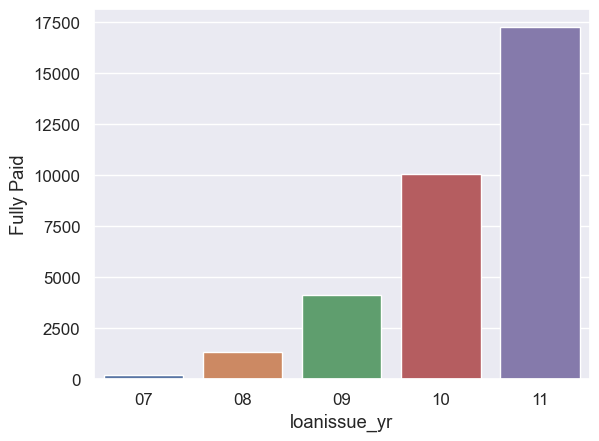

In [144]:
sns.barplot(data=bi_var_loan_date_and_loan_sts, x="loanissue_yr", y="Fully Paid")
print("Both the graph shows that number of loans issued are increasing every year and 2011 is highest")

Ability to pay loan is directly proportiaonl to nummber of year of service as we can see here more the experiece more he is likely to re pay the loan


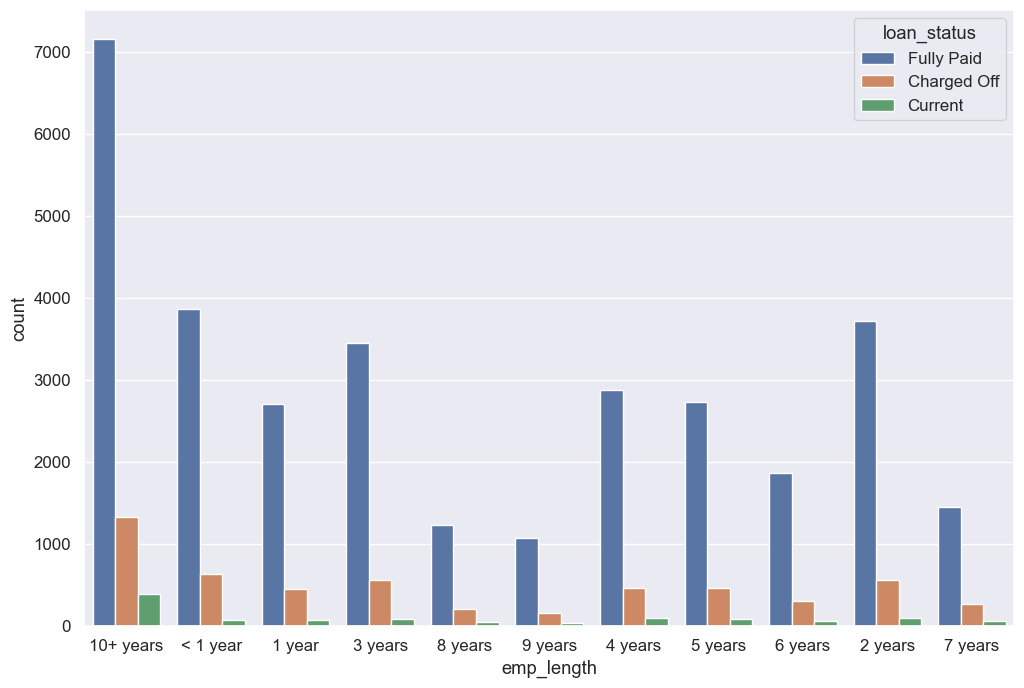

In [145]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1 = sns.countplot(x="emp_length",data=df2,hue='loan_status') ### entire data set 

print("Ability to pay loan is directly proportiaonl to nummber of year of service as we can see here more the experiece more he is likely to re pay the loan")

In [146]:
df2['emp_length'] = df2['emp_length'].str.replace('< ' ,'0.5')# converting to get data for < 1 year
df2['emp_length'] = df2['emp_length'].str.replace('10+' ,'11')# converting to get data for > 10 or 10 plus

df2['emp_num_yr'] = df2['emp_length'].str.extract('(\d+)')

#df2['emp_num_yr'].astype(int)

df2['emp_num_yr2'] = df2['emp_num_yr'].astype(str).astype(float)# converts object type to float or numeric var
#df2['emp_num_yr2'].head()

C:\Users\SAMAN ABBAS\AppData\Local\Temp\ipykernel_16240\1612641340.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['emp_length'] = df2['emp_length'].str.replace('10+' ,'11')# converting to get data for > 10 or 10 plus


In [147]:
##lets look at combined result for that we have to find ratio of charged off in total 
bi_var_emplen_and_loan_sts = df2.groupby(['emp_num_yr2', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bi_var_emplen_and_loan_sts['chargedoff_total'] = bi_var_emplen_and_loan_sts['Charged Off']+bi_var_emplen_and_loan_sts['Current']+ bi_var_emplen_and_loan_sts['Fully Paid']
bi_var_emplen_and_loan_sts['percent_chargedoff_ratio']=bi_var_emplen_and_loan_sts['Charged Off'] / bi_var_emplen_and_loan_sts['chargedoff_total']
#print(bi_var_emplen_and_loan_sts)                                                                                                                              

Inference : There are high percentage of people who are un able to pay if their employment experienvce is less especially less than 1 year


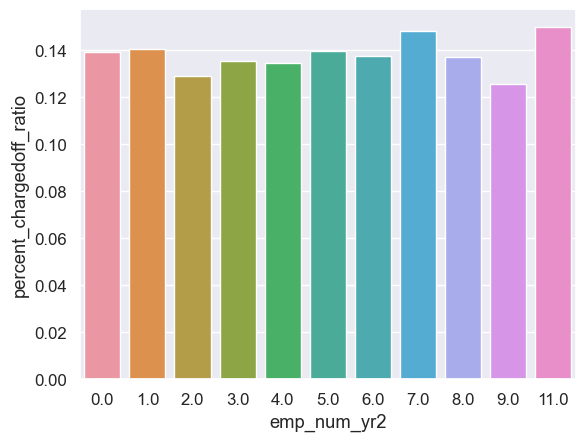

In [148]:
ax = sns.barplot(x="emp_num_yr2",data=bi_var_emplen_and_loan_sts,y='percent_chargedoff_ratio')
print("Inference : There are high percentage of people who are un able to pay if their employment experienvce is less especially less than 1 year")

in fully paid their dti is mostly less than 10 while for charge off their dti is mostly > 10 and further dense for 20 


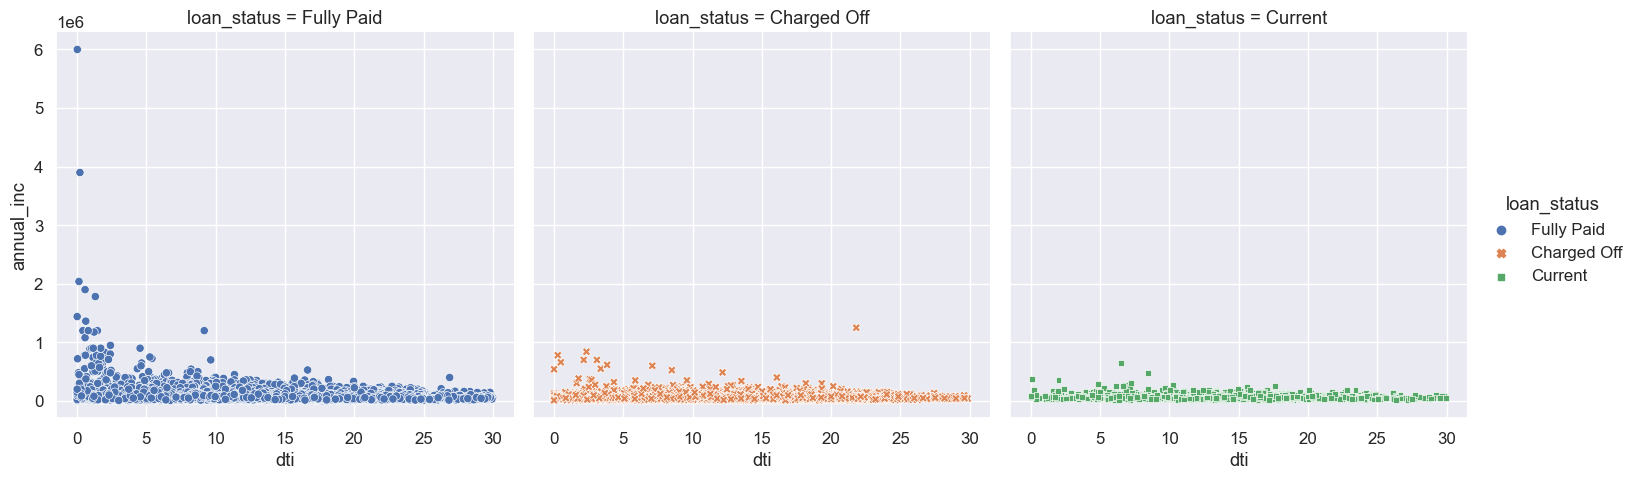

In [149]:
sns.relplot(
    data=df2, x="dti", y="annual_inc",
    col="loan_status", hue="loan_status", style="loan_status",
    kind="scatter"
)
#sns.scatterplot(data=rslt_df, x="annual_inc", y="dti" ,hue = "loan_status") 
print("in fully paid their dti is mostly less than 10 while for charge off their dti is mostly > 10 and further dense for 20 ")

percentage charge off decreases with  increase in income 


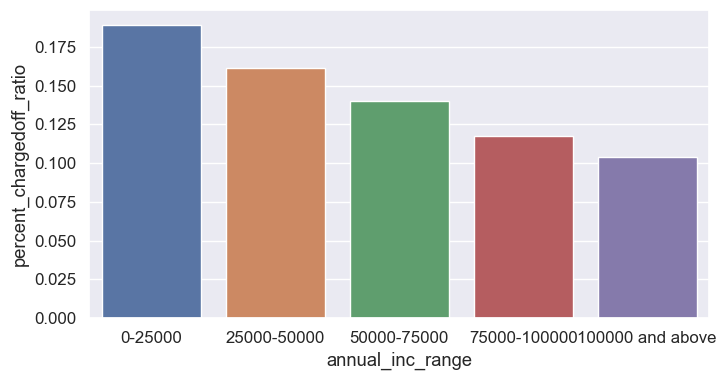

In [150]:
# Create segments for employee income , and compare it with other params like status revolving credit balance or installment or even dti 
df2["annual_inc"].describe()

bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df2['annual_inc_range'] = pd.cut(df2['annual_inc'], bins, labels=slot)

#print(df2.head())

bi_var_annual_inc_and_loan_sts = df2.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

bi_var_annual_inc_and_loan_sts['chargedoff_total'] = bi_var_annual_inc_and_loan_sts['Charged Off']+bi_var_annual_inc_and_loan_sts['Current']+ bi_var_annual_inc_and_loan_sts['Fully Paid']
bi_var_annual_inc_and_loan_sts['percent_chargedoff_ratio']=bi_var_annual_inc_and_loan_sts['Charged Off'] / bi_var_annual_inc_and_loan_sts['chargedoff_total']
fig, ax1 = plt.subplots(figsize=(8,4))
ax1 = sns.barplot(x="annual_inc_range",data=bi_var_annual_inc_and_loan_sts,y='percent_chargedoff_ratio')
print("percentage charge off decreases with  increase in income ")

In [151]:
# segementation for loan amount 
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df2['loan_amnt_range'] = pd.cut(df2['loan_amnt'], bins, labels=slot)
bi_var_intrate_and_loan_amnt = df2.groupby(['loan_amnt_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
print(bi_var_intrate_and_loan_amnt.head())

loan_status loan_amnt_range  Charged Off  Current  Fully Paid
0                    0-5000         1314       96        8158
1                5000-10000         1642      158       11160
2               10000-15000         1055      303        6628
3               15000-20000          751      242        3598
4               20000-25000          542      163        2294


Infernce : percentage charge off increase with  increase in loan amount 


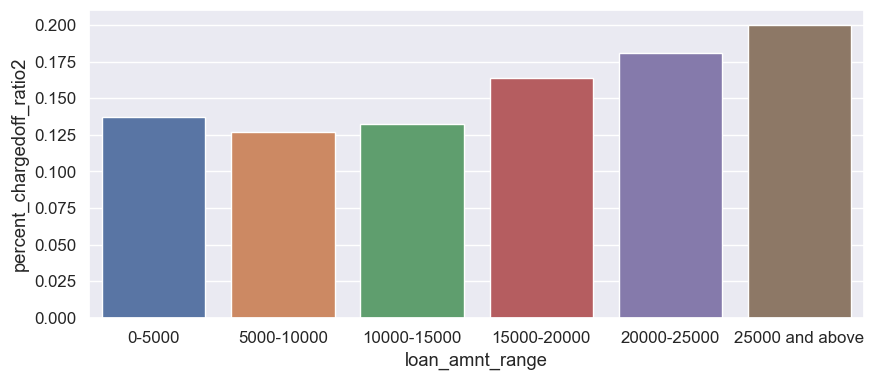

In [152]:
bi_var_intrate_and_loan_amnt['chargedoff_total'] = bi_var_intrate_and_loan_amnt['Charged Off']+bi_var_intrate_and_loan_amnt['Current']+ bi_var_intrate_and_loan_amnt['Fully Paid']
bi_var_intrate_and_loan_amnt['percent_chargedoff_ratio2']=bi_var_intrate_and_loan_amnt['Charged Off'] / bi_var_intrate_and_loan_amnt['chargedoff_total']
#print(bi_var_intrate_and_loan_amnt.head())
fig, ax1 = plt.subplots(figsize=(10,4))
ax1 = sns.barplot(x="loan_amnt_range",data=bi_var_intrate_and_loan_amnt,y='percent_chargedoff_ratio2')
print("Infernce : percentage charge off increase with  increase in loan amount ")

Inference : Charge off is likely to happen for grade E,F,G grade


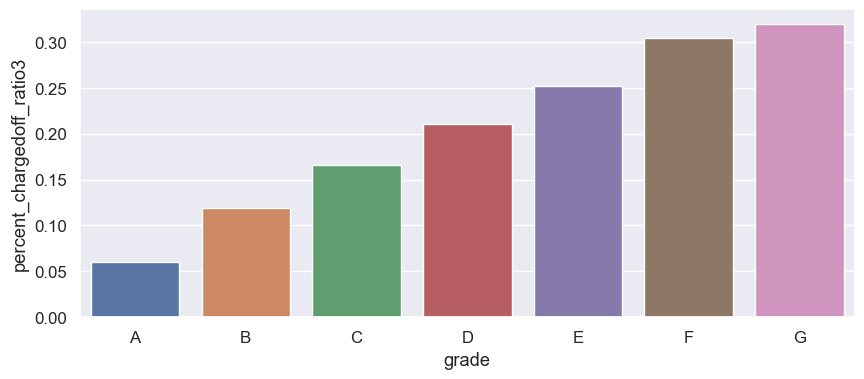

In [153]:
bi_var_intrate_and_grade = df2.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()



bi_var_intrate_and_grade['chargedoff_total'] = bi_var_intrate_and_grade['Charged Off']+bi_var_intrate_and_grade['Current']+ bi_var_intrate_and_grade['Fully Paid']
bi_var_intrate_and_grade['percent_chargedoff_ratio3']=bi_var_intrate_and_grade['Charged Off'] / bi_var_intrate_and_grade['chargedoff_total']
#print(bi_var_intrate_and_grade.head())
fig, ax1 = plt.subplots(figsize=(10,4))
ax1 = sns.barplot(x="grade",data=bi_var_intrate_and_grade,y='percent_chargedoff_ratio3')
print("Inference : Charge off is likely to happen for grade E,F,G grade")